# Homework 3: Data Cleaning and Exploration (50 points)
## Data 119, Spring 2022

**Pandas Cheat Sheet**: There are several Pandas documentation files you can find with a simple search. This is short and informative: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 3 is due on Friday, April 22 at 6:00am.   Submit by uploading to canvas.

In [217]:
# Worked with Kenley A. and Adil K.

In [218]:
# Don't change this cell; just run it. 

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd

## Chicago Divvy Data ##

For this exercise, we downloaded the Chicago Divvy data for the last quarter before the pandemic (Q4 of 2019) from:

https://divvy-tripdata.s3.amazonaws.com/index.html

The map of the system is here:
https://member.divvybikes.com/map/

The list of stations can be found here:
https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations/bbyy-e7gq/data

The downloaded dataset has more than 700K rides, and the provided data contains only a subset of the rides that started or ended around Hyde Park.

In [219]:
# Don't change this cell; just run it.
# The code assumes that the Bike.csv file is in the same directory as the notebook
bike_df=pd.read_csv("Bike.csv")
bike_df.head(10)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25317046,10/7/19 13:39,10/7/19 14:05,4231,1533.0,424,Museum of Science and Industry,355,South Shore Dr & 67th St,Customer,NaN,NaN
1,25577704,10/27/19 16:44,10/27/19 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0
2,25823341,12/4/19 17:24,12/4/19 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0
3,25735449,11/19/19 18:32,11/19/19 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0
4,25716762,11/16/19 21:09,11/16/19 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0
5,25647505,11/5/19 10:18,11/5/19 10:24,2874,378.0,322,Kimbark Ave & 53rd St,423,University Ave & 57th St,Customer,NaN,NaN
6,25360277,10/9/19 18:02,10/9/19 18:07,5967,333.0,322,Kimbark Ave & 53rd St,420,Ellis Ave & 55th St,Subscriber,Male,1998.0
7,25470744,10/18/19 13:50,10/18/19 14:16,5418,1540.0,204,Prairie Ave & Garfield Blvd,424,Museum of Science and Industry,Customer,NaN,NaN
8,25795986,11/29/19 13:27,11/29/19 13:31,6334,204.0,247,Shore Dr & 55th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1971.0
9,25820917,12/4/19 13:13,12/4/19 13:20,6404,416.0,418,Ellis Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,1996.0


### Question 1

The file as provided has some duplicate entries (i.e., duplicate rows). A useful pandas tool for dealing with duplicates can be found here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

Write a program to compute the number of duplicated rows in the dataset.  How many are there?

In [220]:
# Can you do bike_df.valuecounts(bike_df.drop_duplicates())? --> NO

total_rides = bike_df.shape[0]
duplicate_rides = bike_df.drop_duplicates().shape[0]
total_rides, duplicate_rides

(2458, 2438)

In [221]:
# Calculating the number of duplicate rides
total_rides - duplicate_rides

20

### Question 2

Create a data frame called `bikeND` that removes the duplicates and has only unique entries.
Also, calculate the number of unique entries in the `trip_id` column and verify that it is the same as the number of rows.

In [222]:
# Creating new dataframe, with the duplicates filtered out
bikeND_data = bike_df.drop_duplicates()
bikeND = pd.DataFrame(data=bikeND_data)
bikeND

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25317046,10/7/19 13:39,10/7/19 14:05,4231,1533.0,424,Museum of Science and Industry,355,South Shore Dr & 67th St,Customer,NaN,NaN
1,25577704,10/27/19 16:44,10/27/19 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0
2,25823341,12/4/19 17:24,12/4/19 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0
3,25735449,11/19/19 18:32,11/19/19 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0
4,25716762,11/16/19 21:09,11/16/19 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2453,25667748,11/7/19 12:05,11/7/19 12:12,753,371.0,419,Lake Park Ave & 53rd St,424,Museum of Science and Industry,Subscriber,Female,1984.0
2454,25662202,11/6/19 17:32,11/6/19 17:40,2795,469.0,419,Lake Park Ave & 53rd St,423,University Ave & 57th St,Subscriber,Female,1998.0
2455,25296641,10/6/19 8:20,10/6/19 8:32,4349,712.0,417,Cornell Ave & Hyde Park Blvd,328,Ellis Ave & 58th St,Subscriber,Male,1992.0
2456,25247414,10/2/19 14:13,10/2/19 14:18,291,298.0,423,University Ave & 57th St,345,Lake Park Ave & 56th St,Subscriber,Female,1984.0


In [223]:
# Verifying the number of unique entries in the trip_id column
bikeND["trip_id"].nunique()

# trip_id has the same number of entries as the number of rows in the data frame, 2438.

2438

In [224]:
# Verifying the number of unique entries in the trip_id column another way

trip_id_count = bikeND.drop_duplicates(subset = ["trip_id"])
trip_id_count.shape[0]

# trip_id has the same number of entries as the number of rows in the data frame, 2438.

2438

### Question 3

For this and the remaining questions, we will work with the data frame that has unique rows: `bikeND`.

We will now investigate the missing values in the data. Answer these:
1. How many values are missing for each column? 
2. How many rows have one or more missing values?
3. How do missing values differ by user type?


In [225]:
# Counting how many values are misssing for each column
bikeND.isnull().sum()

trip_id                0
start_time             0
end_time               0
bikeid                 0
tripduration           0
from_station_id        0
from_station_name      2
to_station_id          0
to_station_name        2
usertype               0
gender               206
birthyear            199
dtype: int64

In [226]:
# Calculating how many rows have missing values
missing_vals = (bikeND.isnull().sum(axis=1)>0).sum()

# Calling variable
missing_vals

210

In [227]:
# Calculating how many rows are missing n values
n_missing_vals = bikeND.isnull().sum(axis=1).value_counts()

# Calling variable
n_missing_vals

# Overall, there are 210 total rows that are missing 1 or more values. 199 rows are missing 2
#values, and 11 rows are only missing 1 value.

0    2228
2     199
1      11
dtype: int64

In [228]:
# Verifying the kinds of usertypes

# This function outputs an array of the unique values in the usertype column
unique_type = bikeND["usertype"].unique()

# This function outputs an integer of how many unique values are in the usertype column
nunique_type = bikeND["usertype"].nunique()

# This function outputs how many values of data are with the unique values in the 
#usertype column
count_unique_type = bikeND["usertype"].value_counts()

# Calling all variables
unique_type, nunique_type, count_unique_type

(array(['Customer', 'Subscriber'], dtype=object),
 2,
 Subscriber    2080
 Customer       358
 Name: usertype, dtype: int64)

In [229]:
# bikeND_data = bike_df.drop_duplicates()
# bikeND = pd.DataFrame(data=bikeND_data)
# bikeND

# Boolean indexing -- see photos

# bikeND_customer_index = bikeND.set_index("usertype")
# bikeND_customer_data = bikeND_customer_index.drop("Subscriber")
# bikeND_customer = pd.DataFrame(data=bikeND_customer_data)
# bikeND_customer, bikeND_customer["birthyear"].count(), bikeND_customer["gender"].count()

In [230]:
# Creating data frame that only has subscriber user types

bikeND["usertype"].value_counts()

sub_bikeND = bikeND.iloc[np.where(bikeND["usertype"] == "Subscriber")]
sub_bikeND


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
1,25577704,10/27/19 16:44,10/27/19 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0
2,25823341,12/4/19 17:24,12/4/19 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0
3,25735449,11/19/19 18:32,11/19/19 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0
4,25716762,11/16/19 21:09,11/16/19 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0
6,25360277,10/9/19 18:02,10/9/19 18:07,5967,333.0,322,Kimbark Ave & 53rd St,420,Ellis Ave & 55th St,Subscriber,Male,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2453,25667748,11/7/19 12:05,11/7/19 12:12,753,371.0,419,Lake Park Ave & 53rd St,424,Museum of Science and Industry,Subscriber,Female,1984.0
2454,25662202,11/6/19 17:32,11/6/19 17:40,2795,469.0,419,Lake Park Ave & 53rd St,423,University Ave & 57th St,Subscriber,Female,1998.0
2455,25296641,10/6/19 8:20,10/6/19 8:32,4349,712.0,417,Cornell Ave & Hyde Park Blvd,328,Ellis Ave & 58th St,Subscriber,Male,1992.0
2456,25247414,10/2/19 14:13,10/2/19 14:18,291,298.0,423,University Ave & 57th St,345,Lake Park Ave & 56th St,Subscriber,Female,1984.0


In [231]:
# Creating data frame with just customer users
cust_bikeND = bikeND.iloc[np.where(bikeND["usertype"] == "Customer")]
cust_bikeND


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25317046,10/7/19 13:39,10/7/19 14:05,4231,1533.0,424,Museum of Science and Industry,355,South Shore Dr & 67th St,Customer,NaN,NaN
5,25647505,11/5/19 10:18,11/5/19 10:24,2874,378.0,322,Kimbark Ave & 53rd St,423,University Ave & 57th St,Customer,NaN,NaN
7,25470744,10/18/19 13:50,10/18/19 14:16,5418,1540.0,204,Prairie Ave & Garfield Blvd,424,Museum of Science and Industry,Customer,NaN,NaN
13,25467160,10/18/19 8:44,10/18/19 8:51,4200,380.0,425,Harper Ave & 59th St,328,Ellis Ave & 58th St,Customer,Female,1994.0
25,25637010,11/4/19 12:26,11/4/19 12:36,3088,598.0,424,Museum of Science and Industry,424,Museum of Science and Industry,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2418,25719173,11/17/19 14:43,11/17/19 15:03,6169,1201.0,426,Ellis Ave & 60th St,419,Lake Park Ave & 53rd St,Customer,NaN,NaN
2444,25291793,10/5/19 14:22,10/5/19 14:39,1000,1031.0,322,Kimbark Ave & 53rd St,421,MLK Jr Dr & 56th St,Customer,Male,1993.0
2447,25450000,10/16/19 22:52,10/16/19 23:31,4971,2341.0,248,Woodlawn Ave & 55th St,423,University Ave & 57th St,Customer,NaN,NaN
2449,25489116,10/19/19 16:36,10/19/19 17:01,5995,1492.0,419,Lake Park Ave & 53rd St,352,Jeffery Blvd & 67th St,Customer,NaN,NaN


In [232]:
# Calculating the total amount of missing values between customer and subscriber users

nullsubs = sub_bikeND.isna().any(axis=1)
nullsubs = nullsubs.sum()
nullcust = cust_bikeND.isna().any(axis=1)
nullcust = nullcust.sum()

# Printing results

print("There are " + str(nullcust) + " missing values for user that are customers")
print("There are " + str(nullsubs) + " missing values for user that are subscribers")
print("There are significantly more missing values for usertypes that are customers than subscribers")


There are 199 missing values for user that are customers
There are 11 missing values for user that are subscribers
There are significantly more missing values for usertypes that are customers than subscribers


In [233]:
# bikeND_subscriber_index = bikeND.set_index("usertype")
# bikeND_subscriber_data = bikeND_subscriber_index.drop("Customer")
# bikeND_subscriber = pd.DataFrame(data=bikeND_subscriber_data)
# bikeND_subscriber, bikeND_subscriber["birthyear"].count(), bikeND_subscriber["gender"].count()

### Question 4


In this question, we will look into recovering some of the missing data. Answer these:

1. Which missing values can be recovered? 
2. For those that can be recovered, impute their values.

Hint: station ids versus station names.

In [234]:

bikeND[bikeND[['from_station_id','from_station_name']].isnull().any(axis=1)]

bikeND[bikeND[['to_station_id','to_station_name']].isnull().any(axis=1)]


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
44,25601662,10/29/19 18:23,10/29/19 18:27,486,248.0,423,University Ave & 57th St,426,NaN,Subscriber,Male,2000.0
276,25366919,10/10/19 8:10,10/10/19 8:15,875,292.0,345,Lake Park Ave & 56th St,423,NaN,Subscriber,Male,1986.0


In [235]:
bikeND.query('from_station_id == 423')
#University Ave & 57th St

bikeND.query('from_station_id == 418')
#Ellis Ave & 53rd St

bikeND.query('to_station_id == 426')
#Ellis Ave & 60th St

bikeND.query('to_station_id == 423')
#University Ave & 57th St

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
1,25577704,10/27/19 16:44,10/27/19 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0
5,25647505,11/5/19 10:18,11/5/19 10:24,2874,378.0,322,Kimbark Ave & 53rd St,423,University Ave & 57th St,Customer,NaN,NaN
21,25595874,10/29/19 9:20,10/29/19 9:27,1494,408.0,425,Harper Ave & 59th St,423,University Ave & 57th St,Subscriber,Male,1989.0
31,25804474,12/2/19 12:31,12/2/19 12:38,1210,416.0,322,Kimbark Ave & 53rd St,423,University Ave & 57th St,Subscriber,Male,1977.0
42,25274766,10/4/19 11:18,10/4/19 11:21,4993,189.0,248,Woodlawn Ave & 55th St,423,University Ave & 57th St,Subscriber,Female,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2435,25768169,11/24/19 12:27,11/24/19 12:29,5564,136.0,420,Ellis Ave & 55th St,423,University Ave & 57th St,Subscriber,Female,1992.0
2439,25382807,10/11/19 8:38,10/11/19 8:44,4060,343.0,425,Harper Ave & 59th St,423,University Ave & 57th St,Subscriber,Male,1988.0
2447,25450000,10/16/19 22:52,10/16/19 23:31,4971,2341.0,248,Woodlawn Ave & 55th St,423,University Ave & 57th St,Customer,NaN,NaN
2452,25724528,11/18/19 14:21,11/18/19 14:29,3575,488.0,419,Lake Park Ave & 53rd St,423,University Ave & 57th St,Subscriber,Male,1993.0


In [236]:
#'from' imputations
bikeND.at[12,'from_station_name'] = 'University Ave & 57th St'
bikeND.at[175,'from_station_name'] = 'Ellis Ave & 53rd St'

#'to' imputations
bikeND.at[44,'to_station_name'] = 'Ellis Ave & 60th St'
bikeND.at[276,'to_station_name'] = 'University Ave & 57th St'

indexes = [12,175,44,276]
bikeND.loc[indexes]

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
12,25600923,10/29/19 17:49,10/29/19 17:54,2054,328.0,423,University Ave & 57th St,418,Ellis Ave & 53rd St,Subscriber,Male,1980.0
175,25507288,10/21/19 8:38,10/21/19 8:42,4392,288.0,418,Ellis Ave & 53rd St,328,Ellis Ave & 58th St,Subscriber,Female,2000.0
44,25601662,10/29/19 18:23,10/29/19 18:27,486,248.0,423,University Ave & 57th St,426,Ellis Ave & 60th St,Subscriber,Male,2000.0
276,25366919,10/10/19 8:10,10/10/19 8:15,875,292.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1986.0


### Question 5

Print the row that has the longest trip. Before that, investigate the data types for the columns to make sure trip duration is numerical.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

In [135]:
# Max function within column (may not return index), 
#and then grab and print with loc and equality function

bikeND.columns
bikeND.dtypes

#Yes, it is numerical (float64)

bikeND.loc[[bikeND['tripduration'].idxmax()]]


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
408,25575836,10/27/19 15:12,10/28/19 14:09,1187,82667.0,424,Museum of Science and Industry,653,Cornell Dr & Hayes Dr,Customer,NaN,NaN


### Question 6

Investigate if trip durations have similar distributions for male and female riders using a visualization. Create a graph that is useful for this comparison.

In [136]:
# Create a histogram
# Create 2 different dataframes between male and female riders --> grab distribution of trip duration (column)


In [137]:
# Checking how many genders are there
bikeND["gender"].nunique()


2

In [138]:
# Male data frame w/ boolean indexing
male_bikeND = bikeND.loc[(bikeND["gender"] == "Male")]["tripduration"]
male_bikeND


1       283.0
2       486.0
3       174.0
4       633.0
6       333.0
        ...  
2446    263.0
2448    739.0
2452    488.0
2455    712.0
2457    287.0
Name: tripduration, Length: 1614, dtype: float64

In [139]:
# Female data frame w/ boolean indexing
female_bikeND = bikeND.loc[bikeND["gender"] == "Female"]["tripduration"]
female_bikeND 


13      380.0
15      292.0
16      820.0
17      555.0
38      111.0
        ...  
2450    523.0
2451    289.0
2453    371.0
2454    469.0
2456    298.0
Name: tripduration, Length: 618, dtype: float64

In [155]:
# Counting the largest 20 trip durations for outlier considerations
bikeND.nlargest(20, 'tripduration')

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
408,25575836,10/27/19 15:12,10/28/19 14:09,1187,82667.0,424,Museum of Science and Industry,653,Cornell Dr & Hayes Dr,Customer,NaN,NaN
791,25886181,12/14/19 12:49,12/15/19 10:45,4398,78988.0,248,Woodlawn Ave & 55th St,426,Ellis Ave & 60th St,Customer,NaN,NaN
938,25757244,11/22/19 13:11,11/23/19 10:33,3390,76902.0,426,Ellis Ave & 60th St,425,Harper Ave & 59th St,Subscriber,Male,2000.0
182,25317367,10/7/19 14:02,10/8/19 11:16,6235,76457.0,419,Lake Park Ave & 53rd St,247,Shore Dr & 55th St,Customer,NaN,NaN
2376,25378301,10/10/19 18:49,10/11/19 9:06,2957,51444.0,417,Cornell Ave & Hyde Park Blvd,426,Ellis Ave & 60th St,Subscriber,Female,1999.0
759,25625632,11/2/19 23:28,11/3/19 12:40,974,51113.0,426,Ellis Ave & 60th St,423,University Ave & 57th St,Customer,Male,2001.0
884,25233128,10/1/19 15:41,10/1/19 18:48,5019,11191.0,247,Shore Dr & 55th St,247,Shore Dr & 55th St,Customer,Female,1992.0
281,25795731,11/29/19 12:32,11/29/19 15:38,3197,11130.0,322,Kimbark Ave & 53rd St,322,Kimbark Ave & 53rd St,Customer,NaN,NaN
406,25437313,10/16/19 6:28,10/16/19 9:30,1144,10927.0,431,Eberhart Ave & 61st St,431,Eberhart Ave & 61st St,Customer,NaN,NaN
1179,25871808,12/12/19 10:05,12/12/19 13:00,601,10515.0,248,Woodlawn Ave & 55th St,418,Ellis Ave & 53rd St,Customer,Female,1993.0


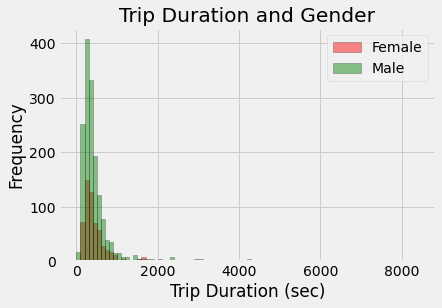

In [237]:
# Visualization, plotting histogram
plt.hist(female_bikeND, label="Female", color = "red", bins=np.arange(start=1, stop=8500, step=100), alpha=0.45, 
        edgecolor = "black")
plt.hist(male_bikeND, label="Male", color = "green", bins=np.arange(start=1, stop=8500, step=100), alpha=0.45, 
        edgecolor = "black")

# Labels
plt.xlabel('Trip Duration (sec)')
# plt.xlim(0, 8000)
plt.ylabel('Frequency')
plt.title("Trip Duration and Gender")
plt.legend()

# ***This histogram excludes 11 outliers whose trip durations were more than
# 8,000 seconds***


### Question 7

Here we investigate the impact of age on trip duration. First create a variable that indicates who is born between 1997-2001 (proxy for college students) versus born in other years. Similarly to Question 6, investigate if trip durations have similar distributions for the two age groups using visualization. Note that riders with no information on age should be ignored for this question.


In [161]:
bikeND.loc[[bikeND["birthyear"].idxmax()]]


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
4,25716762,11/16/19 21:09,11/16/19 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0


In [164]:
# Creating two new dataframes between people born in '97-'01 and everyone else
college_bikeND = bikeND.loc[(bikeND["birthyear"] >= 1997)]["tripduration"]
college_bikeND


3       174.0
4       633.0
6       333.0
11      459.0
18      319.0
        ...  
2434    125.0
2442    363.0
2445    302.0
2454    469.0
2457    287.0
Name: tripduration, Length: 808, dtype: float64

In [165]:
old_bikeND = bikeND.loc[(bikeND["birthyear"] < 1997)]["tripduration"]
old_bikeND


1       283.0
2       486.0
8       204.0
9       416.0
10      513.0
        ...  
2451    289.0
2452    488.0
2453    371.0
2455    712.0
2456    298.0
Name: tripduration, Length: 1431, dtype: float64

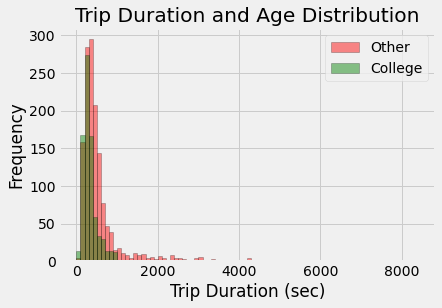

In [166]:
# Visualization, plotting a histogram
plt.hist(old_bikeND, label="Other", color = "red", bins=np.arange(start=1, stop=8500, step=100), alpha=0.45, 
        edgecolor = "black")
plt.hist(college_bikeND, label="College", color = "green", bins=np.arange(start=1, stop=8500, step=100), alpha=0.45, 
        edgecolor = "black")

# Labels
plt.xlabel('Trip Duration (sec)')
# plt.xlim(0, 8000)
plt.ylabel('Frequency')
plt.title("Trip Duration and Age Distribution")
plt.legend()


### Question 8

For all riders whose birth year is available, calculate their approximate age (remember, this data is from late 2019) and create a plot that shows how trip duration varies with age.


In [259]:
## Answer here and in additional cells if needed
# Use pandas apply function and add 3; make sure axis = 1; takes a function in its argument
# Make a for loop / function to calculate age based on subtracting birth year from 2022

ages = 2022 - bikeND['birthyear']
ages = abs(ages)
bikeND["age"] = ages
bikeND

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,dates,day_of_week,Age,age
0,25317046,10/7/19 13:39,10/7/19 14:05,4231,1533.0,424,Museum of Science and Industry,355,South Shore Dr & 67th St,Customer,NaN,NaN,2019-10-07 13:39:00,0,NaN,NaN
1,25577704,10/27/19 16:44,10/27/19 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0,2019-10-27 16:44:00,6,33.0,33.0
2,25823341,12/4/19 17:24,12/4/19 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0,2019-12-04 17:24:00,2,29.0,29.0
3,25735449,11/19/19 18:32,11/19/19 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0,2019-11-19 18:32:00,1,24.0,24.0
4,25716762,11/16/19 21:09,11/16/19 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0,2019-11-16 21:09:00,5,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,25667748,11/7/19 12:05,11/7/19 12:12,753,371.0,419,Lake Park Ave & 53rd St,424,Museum of Science and Industry,Subscriber,Female,1984.0,2019-11-07 12:05:00,3,38.0,38.0
2454,25662202,11/6/19 17:32,11/6/19 17:40,2795,469.0,419,Lake Park Ave & 53rd St,423,University Ave & 57th St,Subscriber,Female,1998.0,2019-11-06 17:32:00,2,24.0,24.0
2455,25296641,10/6/19 8:20,10/6/19 8:32,4349,712.0,417,Cornell Ave & Hyde Park Blvd,328,Ellis Ave & 58th St,Subscriber,Male,1992.0,2019-10-06 08:20:00,6,30.0,30.0
2456,25247414,10/2/19 14:13,10/2/19 14:18,291,298.0,423,University Ave & 57th St,345,Lake Park Ave & 56th St,Subscriber,Female,1984.0,2019-10-02 14:13:00,2,38.0,38.0


Text(0.5, 1.0, 'Distribution of Riders by Age')

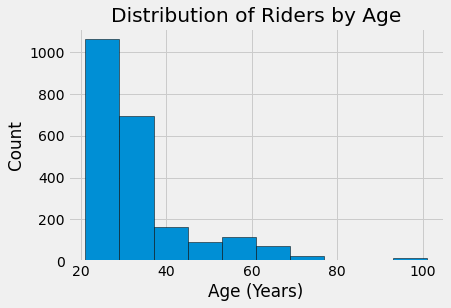

In [262]:
# Visualization, a histogram
bikeND.hist(["age"], edgecolor="black")

# Labels and titles
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.title("Distribution of Riders by Age")

### Question 9

Extract day of the week from `start_time` and look at trip duration by day of the week. Create a plot that summarizes your findings.

Hint. Options for extracting day of the week:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html


In [241]:
## Answer here and in additional cells if needed
# Use datetime index function to start_time to access days of the week
# Use grouby function to group all rides at each day of the week and use a count/sum function to count how many rides
# were on each of the day of the week
# create a histogram --> where count is the mean and each bin will represent each average ride duration for day of week

# Days of the week: 0-6 with 0 = Monday and 6 = Sunday

import datetime

bikeND["dates"] = pd.to_datetime(bikeND.start_time)
bikeND["day_of_week"] = bikeND["dates"].dt.dayofweek


Text(0.5, 1.0, 'Frequency of Bike Trips per Day of Week')

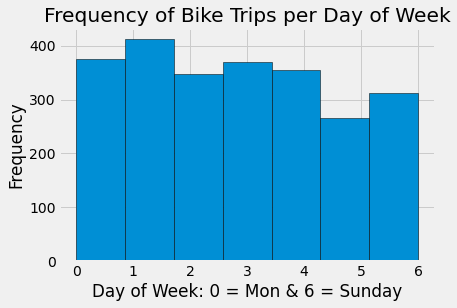

In [248]:
# Visualization, plotting a histogram where each bin is a day of the week
bikeND.hist(["day_of_week"], bins = 7, edgecolor = "black")

# Labels
plt.xlabel("Day of Week: 0 = Mon & 6 = Sunday")
plt.ylabel("Frequency")
plt.title("Frequency of Bike Trips per Day of Week")


### Question 10

Station 423 is in front of Regenstein Library. What is the most common hour of the day (10am, 11pm etc) to start a trip there? What is the most common hour of the day to end a trip there? 

For this exercise, all the trips that start between 10:00am and 10:59am are considered in the 10am group.


In [254]:
reg_start = bikeND.iloc[np.where(bikeND['from_station_id'] == 423)]
reg_start['hour'] = reg_start['dates'].dt.hour
print(reg_start['hour'].value_counts())
#The most common hour that a trip begins from the Reg is at 7:00 p.m.


17    64
16    59
18    44
14    39
19    28
12    26
15    23
13    21
20    20
10    15
11    15
21    15
23    12
22     9
9      7
1      6
8      4
7      3
0      2
2      2
6      1
Name: hour, dtype: int64


/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_23191/2667251893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_start['hour'] = reg_start['dates'].dt.hour


In [253]:
reg_end = bikeND.iloc[np.where(bikeND['to_station_id'] == 423)]
reg_end['hour'] = reg_end['dates'].dt.hour
print(reg_end['hour'].value_counts())
#The most common hour a trip ends at the Reg is at 8:00 a.m.


8     62
9     53
13    38
10    33
12    26
19    26
14    25
15    24
11    22
18    21
16    20
17    14
7     11
20    10
21     8
22     6
23     5
5      5
6      4
1      2
0      1
Name: hour, dtype: int64


/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_23191/511249000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_end['hour'] = reg_end['dates'].dt.hour


### Question 11

Find the most popular date for bike riding in this dataset.

In [187]:
## Answer here and in additional cells if needed
bikeND["start_time"]

max(days_of_week.dt.date)


datetime.date(2019, 12, 31)

### Question 12

Ask an interesting question that you could answer with these data and **then provide a data-based answer to your question.** 

(For example, "Do younger riders take longer trips?" - of course you can't use this one since it's already been asked and answered above.)

In [182]:
## Answer here and in additional cells if needed

# Question: Which stations are bikes taken from the most?

bikeND.from_station_name.nunique()
# this shows that there are 79 different stations in this area or in this data set

79

In [212]:
bikeND.groupby("from_station_name", sort = False).nunique()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,to_station_id,to_station_name,usertype,gender,birthyear
from_station_name,,,,,,,,,,,
Museum of Science and Industry,43,43,43,42,43,1,22,22,2,2,11
Lake Park Ave & 56th St,128,128,128,117,108,1,18,18,2,2,29
University Ave & 57th St,415,413,410,319,294,1,24,24,2,2,38
Woodlawn Ave & 55th St,126,126,126,113,112,1,18,18,2,2,28
Kimbark Ave & 53rd St,248,248,247,215,196,1,28,28,2,2,33
...,...,...,...,...,...,...,...,...,...,...,...
Clark St & Lake St,1,1,1,1,1,1,1,1,1,1,1
Wentworth Ave & 33rd St,1,1,1,1,1,1,1,1,1,1,1
Morgan St & 31st St,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# The University Ave. & 57th St. station was the most used station
#by riders in the Chicagoland area